## Project 1 - Team Malthus
### Introduction
For our project, our group is focusing on ...
### Import Libraries

In [35]:
# %pip install cufflinks
# %pip install wbdata
import wbdata
import sys
import os
import pandas as pd
import datetime
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt 

sys.path.append('./src')

from team_malthus import pop

cf.go_offline()


### use function to get specific age range of data

In [36]:
# get the scalar dependency ratio in 2000, and 2020
# using our custom function in the 'pop' package
children_2000 = pop.population( 
        year=2000, 
        sex="m",
        age_range="0-14",
        place="NAM") 

working_age_2000 = pop.population( 
        year=2000, 
        sex="m",
        age_range="15-65",
        place="NAM") 

elderly_2000 = pop.population( 
        year=2000, 
        sex="m",
        age_range="66-100",
        place="NAM") 

children_2020 = pop.population( 
        year=2020, 
        sex="m",
        age_range="0-14",
        place="NAM") 

working_age_2020 = pop.population( 
        year=2020, 
        sex="m",
        age_range="15-65",
        place="NAM") 

elderly_2020 = pop.population( 
        year=2020, 
        sex="m",
        age_range="66-100",
        place="NAM") 

dependency_ratio_2000 = ((children_2000 + elderly_2000) / working_age_2000) * 100
dependency_ratio_2020 = ((children_2020 + elderly_2020) / working_age_2020) * 100

print(f'dependency_ratios 2000: {dependency_ratio_2000} 2020: {dependency_ratio_2020} ')

dependency_ratios 2000: 81.5765762979549 2020: 67.11100170780416 


In [39]:
# use our function to get a dataframe with breakdowns by age group

df = pop.population_df(country=["USA", "NAM"])
display(df)

male_0_4  female_0_4    male_5_9  female_5_9  \
country       date                                                   
Namibia       2022    166945.0    166301.0    157787.0    158902.0   
              2021    166521.0    166054.0    155285.0    156738.0   
              2020    165958.0    165650.0    152328.0    154033.0   
              2019    165349.0    165170.0    149064.0    150923.0   
              2018    164604.0    164513.0    145544.0    147456.0   
...                        ...         ...         ...         ...   
United States 1964  10238054.0   9892122.0  10229317.0   9868928.0   
              1963  10326196.0   9984933.0  10102636.0   9747508.0   
              1962  10374649.0  10035091.0   9913431.0   9568514.0   
              1961  10370108.0  10029071.0   9880207.0   9515106.0   
              1960  10294500.0   9951249.0   9698745.0   9346706.0   

                    male_10_14  female_10_14  male_15_19  female_15_19  \
country       date                                                       
Namibia       2022    138796.0      141572.0    118803.0      122027.0   
              2021    134288.0      137180.0    117406.0      120602.0   
              2020    130102.0      133073.0    116947.0      120093.0   
              2019    126393.0      129433.0    117391.0      120493.0   
              2018    123276.0      126387.0    118329.0      121407.0   
...                        ...           ...         ...           ...   
United States 1964   9361755.0     9014905.0   8052724.0     7951304.0   
              1963   9027461.0     8671299.0   7805866.0     7748472.0   
              1962   8888062.0     8574165.0   7456087.0     7371659.0   
              1961   8627853.0     8360051.0   6940722.0     6878559.0   
              1960   8334413.0     8048264.0   6582483.0     6548531.0   

                    male_20_24  female_20_24  ...  male_60_64  female_60_64  \
country       date                            ...                             
Namibia       2022    115272.0      118436.0  ...     23387.0       32366.0   
              2021    115308.0      118434.0  ...     22971.0       31661.0   
              2020    115136.0      118321.0  ...     22407.0       30845.0   
              2019    115394.0      118705.0  ...     21701.0       29931.0   
              2018    116388.0      119830.0  ...     20982.0       29001.0   
...                        ...           ...  ...         ...           ...   
United States 1964   6268166.0     6593502.0  ...   3478614.0     3889258.0   
              1963   6007957.0     6309660.0  ...   3497785.0     3895651.0   
              1962   5699131.0     5984578.0  ...   3495944.0     3881892.0   
              1961   5575583.0     5770351.0  ...   3458132.0     3834536.0   
              1960   5480961.0     5626027.0  ...   3466668.0     3833465.0   

                    male_65_69  female_65_69  male_70_74  female_70_74  \
country       date                                                       
Namibia       2022     16275.0       24924.0     10542.0       17780.0   
              2021     16274.0       24653.0     10690.0       17456.0   
              2020     16089.0       24203.0     10666.0       16950.0   
              2019     15706.0       23580.0     10450.0       16268.0   
              2018     15270.0       22848.0     10188.0       15606.0   
...                        ...           ...         ...           ...   
United States 1964   3024239.0     3645486.0   2283075.0     2859831.0   
              1963   2982959.0     3556866.0   2278105.0     2803929.0   
              1962   2918741.0     3433035.0   2283351.0     2762829.0   
              1961   2891410.0     3349577.0   2259822.0     2691523.0   
              1960   2870722.0     3280254.0   2213496.0     2600301.0   

                    male_75_79  female_75_79  male_80_UP  female_80_UP  
country       date                                                      
Namibia    

Namibia is extremely sparcely populated

Below is a rendering of population density in 2020
(source: https://hub.worldpop.org/geodata/listing?id=76 )

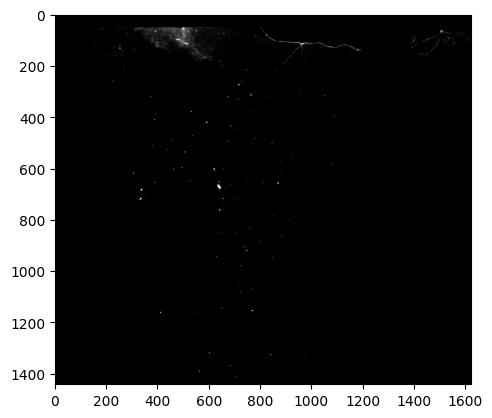

In [37]:

f = plt.figure() 

src = plt.imread('data/nam_pd_2020_1km.tif')

plt.imshow(src)

In [16]:

def get_population_df (country):
    countries = [country]
    indicators = {"SP.POP.GROW": "population_growth"}
    return wbdata.get_dataframe(indicators, country=countries)   


In [17]:
import numpy as np

variable_labels = {"SP.POP.TOTL":"Population"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World",
             "NAM":"Namibia",
            "ZAF":"South Africa"}

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
np.log(df).diff().iplot(title="Similar Popualtion Growth Rates, Namibian growth rate generally higher post-independence",
                        yTitle="Growth Rate (%)",xTitle='Year',
                       )

In [18]:
# Data from WDI on age-sex comes in the forms of variables
# which take the form "SP.POP.LLHH.MA" for males
# and "SP.POP.LLHH.FE" for females, where LL is the *low* end of
# age range, like "05" for 5-yo, and HH is the *high* end.

# We construct a list of age-ranges.

# Start with an empty list of age-rages
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

In [19]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

In [20]:
df = wbdata.get_dataframe(variables,country="NAM")


In [21]:


py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

#year = range(2020,1960,-20)
year=2020
bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='darkseagreen'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color = 'midnightblue'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

In [22]:
df = wbdata.get_dataframe(variables,country="ZAF")

In [23]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year =2020

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='red'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color = 'gold'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

# fig_population_growth = go.Figure(data=[trace_population_growth], layout=layout_population_growth)

In [24]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

df = wbdata.get_dataframe (variables, country="NAM")
py.init_notebook_mode(connected=True)

# Namibia Population Pyramid
layout_namibia = go.Layout(barmode='overlay',
                           yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                           xaxis=go.layout.XAxis(title='Number'),
                           title='Namibia Population Pyramid')

year_namibia = 2020

bins_NAM = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
                       y=[int(s[:2]) + 1 for s in age_ranges],
                       orientation='h',
                       name='Namibia - Men',
                       marker=dict(color='darkseagreen'),
                       hoverinfo='skip'),

                go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                       y=[int(s[:2]) + 1 for s in age_ranges],
                       orientation='h',
                       name='Namibia - Women',
                       marker=dict(color='midnightblue'),
                       hoverinfo='skip',
                       )
                ]
df2 = wbdata.get_dataframe (variables, country="ZAF")

# South Africa Population Pyramid
layout_south_africa = go.Layout(barmode='overlay',
                                yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                                xaxis=go.layout.XAxis(title='Number'),
                                title='South Africa Population Pyramid')

year_south_africa = 2020

bins_SSF = [go.Bar(x = df2.loc[str(year),:].filter(regex="Male").values,
                            y=[int(s[:2]) + 1 for s in age_ranges],
                            orientation='h',
                            name='South Africa - Men',
                            marker=dict(color='red'),
                            hoverinfo='skip'),

                     go.Bar(x = -df2.loc[str(year),:].filter(regex="Female").values,
                            y=[int(s[:2]) + 1 for s in age_ranges],
                            orientation='h',
                            name='South Africa - Women',
                            marker=dict(color='gold'),
                            hoverinfo='skip',
                            )
                     ]

# Combine Namibia and South Africa Population Pyramids
fig = go.Figure(data=bins_NAM + bins_SSF, layout=go.Layout(barmode='group',
                                                                        yaxis=go.layout.YAxis(
                                                                            range=[0, 90], title='Age'),
                                                                        xaxis=go.layout.XAxis(title='Number'),
                                                                        title='Combined Population Pyramids'))

# Add a legend
fig.update_layout(legend=dict(x=0.75, y=1.1))

# Show the plot
py.iplot(fig)

In [25]:
import numpy as np
import wbdata
import cufflinks as cf
cf.go_offline()

def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

### Cereal Production & Land: Namibia and South Africa

In [26]:
vars = {"AG.PRD.CREL.MT":"Cereal production"}

use=["ZAF","NAM"]

cereals = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country')

# Use this to find top producers:
#big_producers = cereals.query('date==2020').squeeze().sort_values(ascending=False)
#big_producers.head(20)

cereals.iplot(xTitle="Year",yTitle="Metric Tons",
              title="Cereal Production in Namibia and South Africa")

### Livestock Index: Namibia and the World

In [27]:
elem = {"AG.PRD.LVSK.XD":"Livestock index"}

uses=["NAM","USA","IND","CHN","RUS","WLD"]

geo = (fix_date_index(wbdata.get_dataframe(elem,country=uses)).squeeze().unstack('country'))
geo.iplot(xTitle="Year",yTitle="Metric Tons", title="Livestock Index (1960-2020)")


### Crop Index: Namibia and the World

In [28]:
y = {"AG.PRD.CROP.XD":"Crop index"}

x=["NAM","USA","IND","CHN","RUS","WLD"]

geo = (fix_date_index(wbdata.get_dataframe(y,country=x)).squeeze().unstack('country'))
geo.iplot(xTitle="Year",yTitle="Metric Tons", title="Crop Index (1960-2020)")

### Permanent Cropland: Namibia and the World

In [29]:
vars = {"AG.LND.CROP.ZS":"Permanent Cropland"}

users = ["NAM","USA","IND","CHN","RUS","WLD"]

geo = (fix_date_index(wbdata.get_dataframe(vars,country=users)).squeeze().unstack('country'))
geo.iplot(xTitle="Year",yTitle="Percentage of Land Area(%)", title="Total Percentange of Permanent Cropland (1960-2020)")

### FAO Food Index: Namibia and South Africa
The FAO compiles a series of data meant to measure changes in the supply of food of all sorts, including both plant and animal sources.


In [30]:
vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index",
        "SP.POP.TOTL":"Population"}

use=["ZAF"]

food = fix_date_index(wbdata.get_dataframe(vars, country = use)).dropna()
# Add population back...
Population = food.Population

# Weight indices by population
food = food.filter(regex='index$').multiply(Population,axis=0)

food['Population'] = Population

# No "WLD" or other regions; add up all countries
food = food.groupby('date').sum().replace(0,np.nan).dropna()

food.sort_index(inplace=True)

# Normalize so 2000 = 1
food = food/food.loc[2000,:]

food.iplot(xTitle="Year", yTitle="Index", title="FAO Food Index in South Africa")

And here in growth rates:

In [31]:
np.log(food).diff().iplot(xTitle="Year",yTitle="Growth rates", title="FAO Food Index Growth Rates in South Africa")

In [32]:
vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index",
        "SP.POP.TOTL":"Population"}

use=["NAM"]

food = fix_date_index(wbdata.get_dataframe(vars, country = use)).dropna()
# Add population back...
Population = food.Population

# Weight indices by population
food = food.filter(regex='index$').multiply(Population,axis=0)

food['Population'] = Population

# No "WLD" or other regions; add up all countries
food = food.groupby('date').sum().replace(0,np.nan).dropna()

food.sort_index(inplace=True)

# Normalize so 2000 = 1
food = food/food.loc[2000,:]

food.iplot(xTitle="Year",yTitle="Index", title="FAO Food Index in Namibia")

In [33]:
np.log(food).diff().iplot(xTitle="Year",yTitle="Growth rates", title="FAO Food Index Growth Rates in Namibia")